In [63]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.layers import Dense, LeakyReLU, BatchNormalization # for adding layers 

In [64]:
mnist = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist

In [65]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


In [66]:
x_train = tf.cast(x_train, tf.float32)
x_train = x_train/255
x_train0 = np.reshape(x_train, [-1, 28*28])

In [67]:
x_train90 = np.rot90(x_train, k=1, axes=(1, 2))
x_train90 = np.reshape(x_train90, [-1, 28*28])

In [68]:
x_test = tf.cast(x_test, tf.float32)
x_test = x_test/255
x_test0 = np.reshape(x_test, [-1, 28*28])
x_test90 = np.rot90(x_test, k=1, axes=(1, 2))
x_test90 = np.reshape(x_test90, [-1, 28*28])

In [69]:
print("x_train0: ", x_train0.shape)
print("x_train90: ", x_train90.shape)
print("x_test0: ", x_test0.shape)
print("x_test90: ", x_test0.shape)

x_train0:  (60000, 784)
x_train90:  (60000, 784)
x_test0:  (10000, 784)
x_test90:  (10000, 784)


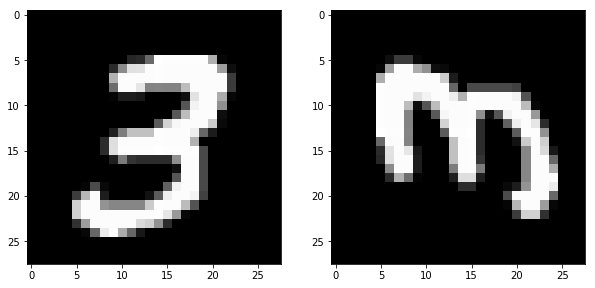

In [70]:
index = 7
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1,2,1)
plt.imshow(np.reshape(x_train0[index], (28, 28)), cmap="gray")
fig.add_subplot(1,2,2)
plt.imshow(np.reshape(x_train90[index], (28, 28)), cmap="gray")

Initialize the parameters

In [71]:
#--- Define Shapes
n_inputs=x_train0.shape[1] # number of input neurons = the number of features X_train

#--- Input Layer 
visible = tf.keras.Input(shape=(n_inputs,), name='Input-Layer') # Specify input shape

#--- Encoder Layer
e = Dense(units=256, name='Encoder-Layer')(visible)
e = BatchNormalization(name='Encoder-Layer-Normalization')(e)
e = LeakyReLU(name='Encoder-Layer-Activation')(e)

#--- Middle Layer
middle = Dense(units=128, activation='linear', activity_regularizer=tf.keras.regularizers.L1(0.0001), name='Middle-Hidden-Layer')(e)

#--- Decoder Layer
d0 = Dense(units=256, name='Decoder-Layer0')(middle)
d0 = BatchNormalization(name='Decoder-Layer-Normalization0')(d0)
d0 = LeakyReLU(name='Decoder-Layer-Activation0')(d0)

d90 = Dense(units=256, name='Decoder-Layer90')(middle)
d90 = BatchNormalization(name='Decoder-Layer-Normalization90')(d90)
d90 = LeakyReLU(name='Decoder-Layer-Activation90')(d90)


#--- Output layer
output0 = Dense(units=n_inputs, activation='sigmoid', name='Output-Layer0')(d0)
output90 = Dense(units=n_inputs, activation='sigmoid', name='Output-Layer90')(d90)

# Define denoising autoencoder model
model = tf.keras.models.Model(inputs=visible, outputs=[output0, output90], name='Y-shaped_Autoencoder-Model')
# model = tf.keras.models.Model(inputs=visible, outputs=[output0], name='Y-shaped_Autoencoder-Model')

# Compile denoising autoencoder model
model.compile(optimizer='adam', loss={'Output-Layer0':'mse', 'Output-Layer90':'mse'},)
# model.compile(optimizer='adam', loss={'Output-Layer0':'mse'},)
# Print model summary
print(model.summary())

Model: "Y-shaped_Autoencoder-Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Layer (InputLayer)       [(None, 784)]        0           []                               
                                                                                                  
 Encoder-Layer (Dense)          (None, 256)          200960      ['Input-Layer[0][0]']            
                                                                                                  
 Encoder-Layer-Normalization (B  (None, 256)         1024        ['Encoder-Layer[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 Encoder-Layer-Activation (Leak  (None, 256)         0           ['Encode

In [72]:
history = model.fit( {'Input-Layer':x_train0}, {'Output-Layer0':x_train0, 'Output-Layer90':x_train90}, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0298 - Output-Layer0_loss: 0.0130 - Output-Layer90_loss: 0.0130
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0140 - Output-Layer0_loss: 0.0060 - Output-Layer90_loss: 0.0060
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0110 - Output-Layer0_loss: 0.0050 - Output-Layer90_loss: 0.0050
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0093 - Output-Layer0_loss: 0.0043 - Output-Layer90_loss: 0.0043
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0083 - Output-Layer0_loss: 0.0039 - Output-Layer90_loss: 0.0039
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0077 - Output-Layer0_loss: 0.0037 - Output-Layer90_loss: 0.0037
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0072 - Output-Layer0_loss: 0.0035 - Output-Layer90_loss: 0.0035
Epoch 

In [79]:
 [x_reconstruct0, x_reconstruct90]=model.predict(x_test0)

313/313 [==============================] - 1s 2ms/step


In [80]:
x_reconstruct90.shape

(10000, 784)

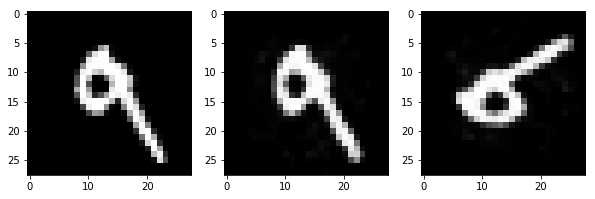

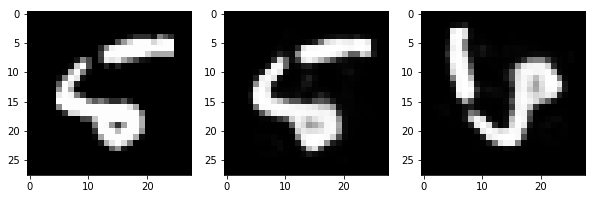

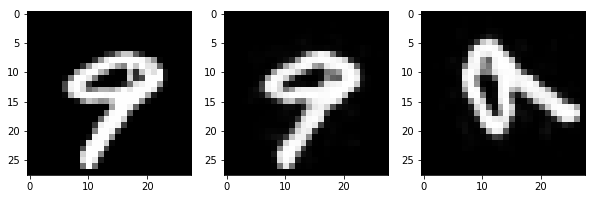

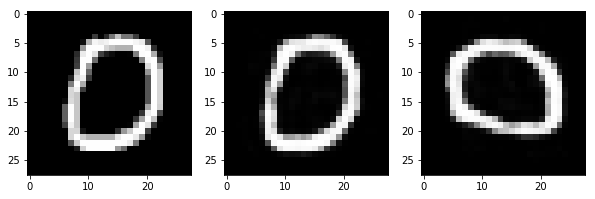

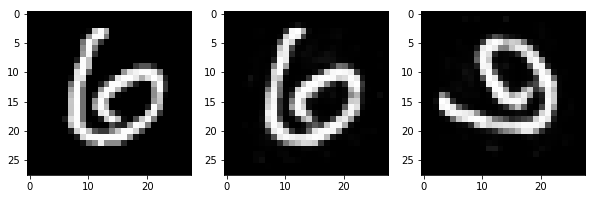

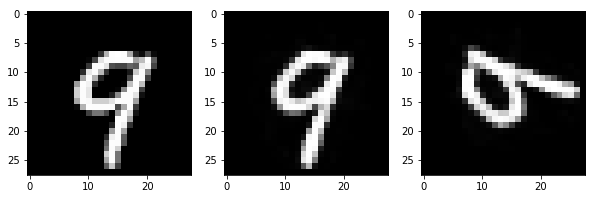

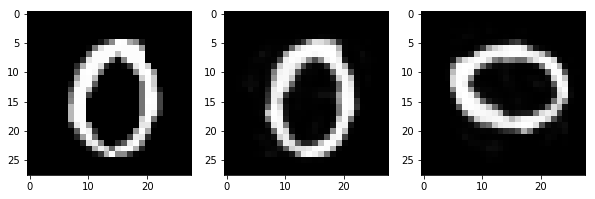

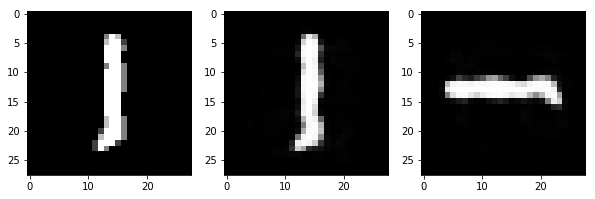

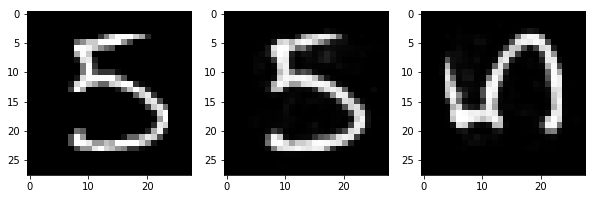

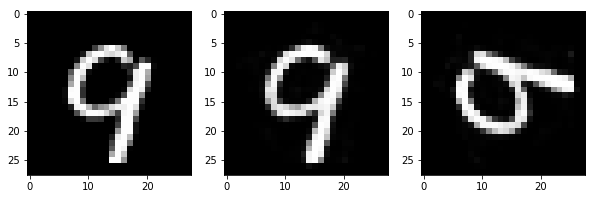

In [82]:
index = 7
c=10
r=3
for i in range(10):
    fig = plt.figure(figsize=(10, 40))
    fig.add_subplot(c,r,1)
    plt.imshow(np.reshape(x_test0[index+i], (28, 28)), cmap="gray")
    fig.add_subplot(c,r,2)
    plt.imshow(np.reshape(x_reconstruct0[index+i], (28, 28)), cmap="gray")
    fig.add_subplot(c,r,3)
    plt.imshow(np.reshape(x_reconstruct90[index+i], (28, 28)), cmap="gray") 